In [1]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split


In [23]:
# open data
data = pd.read_csv('data/bicikelj_preprocessed.csv')
data = data.drop(columns=["yesterday", "timestamp"])
data
# make station id categorical
data["station"] = data["station"].astype("category")
# transform station into one-hot encoding
data = pd.get_dummies(data, columns=["station"])

station              category
target                  int64
time_of_day_sin       float64
time_of_day_cos       float64
temperature           float64
precipitation         float64
snow_depth            float64
cloud_cover           float64
is_day                float64
praznik                 int64
poletne_pocitnice       int64
zimske_pocitnice        int64
day_of_week             int64
daily_lag_1           float64
lag_1                 float64
lag_2                 float64
lag_3                 float64
lag_4                 float64
lag_5                 float64
dtype: object

In [37]:
# split the data into train and test
train, test = np.split(data.sample(frac=1), [int(.8*len(data))])

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [38]:
train.shape, test.shape, data.shape

((446805, 101), (111702, 101), (558507, 101))

In [39]:
X_train, y_train = train.drop(columns=["target"], axis=1), train['target']
X_test, y_test = test.drop(columns=["target"], axis=1), test['target']

In [41]:
# prepare an xgboost model
model = xgb.XGBRegressor()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

test["prediction"] = y_pred

array([ 8.963488 ,  3.010104 ,  7.004599 , ..., 15.024029 ,  1.9832116,
        4.1196156], dtype=float32)

In [42]:
# compute the MSE
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_pred)

0.6375695840443489

In [43]:
X_train.columns

Index(['time_of_day_sin', 'time_of_day_cos', 'temperature', 'precipitation',
       'snow_depth', 'cloud_cover', 'is_day', 'praznik', 'poletne_pocitnice',
       'zimske_pocitnice', 'day_of_week', 'daily_lag_1', 'lag_1', 'lag_2',
       'lag_3', 'lag_4', 'lag_5', 'station_ALEJA - CELOVŠKA CESTA',
       'station_AMBROŽEV TRG', 'station_ANTONOV TRG',
       'station_BARJANSKA C.-CENTER STAREJŠIH TRNOVO', 'station_BAVARSKI DVOR',
       'station_BONIFACIJA', 'station_BRATOVŠEVA PLOŠČAD', 'station_BREG',
       'station_BRODARJEV TRG', 'station_BS4-STOŽICE',
       'station_BTC CITY ATLANTIS', 'station_BTC CITY/DVORANA A',
       'station_CANKARJEVA UL.-NAMA', 'station_CESTA NA ROŽNIK',
       'station_CITYPARK', 'station_DOLENJSKA C. - STRELIŠČE',
       'station_DRAVLJE', 'station_DUNAJSKA C.-PS MERCATOR',
       'station_DUNAJSKA C.-PS PETROL',
       'station_GERBIČEVA - ŠPORTNI PARK SVOBODA',
       'station_GH ŠENTPETER-NJEGOŠEVA C.',
       'station_GRUDNOVO NABREŽJE-KARLOVŠKA C.',

<Axes: >

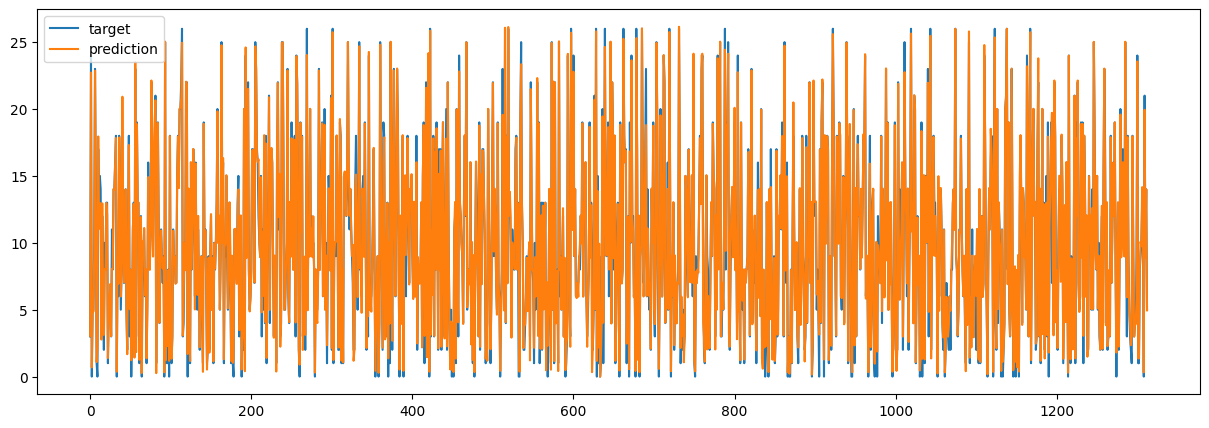

In [54]:
# select one of the stations:
station = "station_KINO ŠIŠKA"

siska = test[test[station] == 1]
siska.reset_index()[['target', 'prediction']].plot(figsize=(15, 5))